# Regular solutions

This follows Figure 10 of A.D. Pelton, W.T. Thompson, Phase diagrams, Progress in Solid State Chemistry, 10(3) (1975) 119-155 doi: [10.1016/0079-6786(75)90004-7](https://doi.org/10.1016/0079-6786(75)90004-7)

Import the code we need:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from pycalphad import Database, binplot, variables as v
from pycalphad.plot.utils import phase_legend

We define a simple TDB file where the entropy of melting, melting temperature and regular solution parameters defined with `FUNCTION` lines. This stores them in the `dbf.symbols` dictionary and allows them to be overriden at runtime using the `parameters` argument to `calculate` and `equilibrium`. Following Pelton and Thompson, we define two elements, A and B, and two phases, ALPHA and BETA, each having an entropy of melting of 10 J/K-mol and with melting temperatures of 800 K and 1200 K, respectively. The initial value for the regular solution parameter is zero for both phases (an ideal solution).

At the end of the cell, the database is loaded into a pycalphad `Database` object.

In [2]:
SOLN_TDB = """

ELEMENT A ALPHA 0.0 0.0 0.0 !
ELEMENT B ALPHA 0.0 0.0 0.0 !

TYPE_DEFINITION % SEQ *!    

PHASE ALPHA % 1 1 !
CONSTITUENT ALPHA : A B : !

PHASE BETA % 1 1 !
CONSTITUENT BETA : A B : !

$ Melting temperatures in Kelvin
FUNCTION TM_A 1 800; 10000 N !
FUNCTION TM_B 1 1200; 10000 N !

$ Entropy of melting
FUNCTION SM_A 1 10; 10000 N !
FUNCTION SM_B 1 10; 10000 N !

$ Regular solution parameters
$ Initial values are zero (ideal)
FUNCTION L_ALPHA 1 0.0; 10000 N !
FUNCTION L_BETA 1 0.0; 10000 N !

$ Set the ALPHA lattice stability to zero
PARAMETER G(ALPHA,A;0) 1 0.0; 10000 N !
PARAMETER G(ALPHA,B;0) 1 0.0; 10000 N !

$ Set the BETA lattice stability to melt A and B at TM, assuming G(ALPHA,*)=0
$ At TM, 0 = A - B*T, so A = BT
PARAMETER G(BETA,A;0) 1 SM_A*TM_A - SM_A*T; 10000 N !
PARAMETER G(BETA,B;0) 1 SM_B*TM_B - SM_B*T; 10000 N !

$ Regular solution energy terms
PARAMETER L(ALPHA,A,B;0) 1 L_ALPHA; 10000 N !
PARAMETER L(BETA,A,B;0) 1 L_BETA; 10000 N !

"""

dbf = Database(SOLN_TDB)

Create a grid of phase diagrams for a set of regular solution parameters for ALPHA and BETA. The conditions can be modified to increase/decrease the resolution of details that can be picked up, trading off computational expense.

CPU times: user 6min 6s, sys: 5.23 s, total: 6min 11s
Wall time: 6min 6s


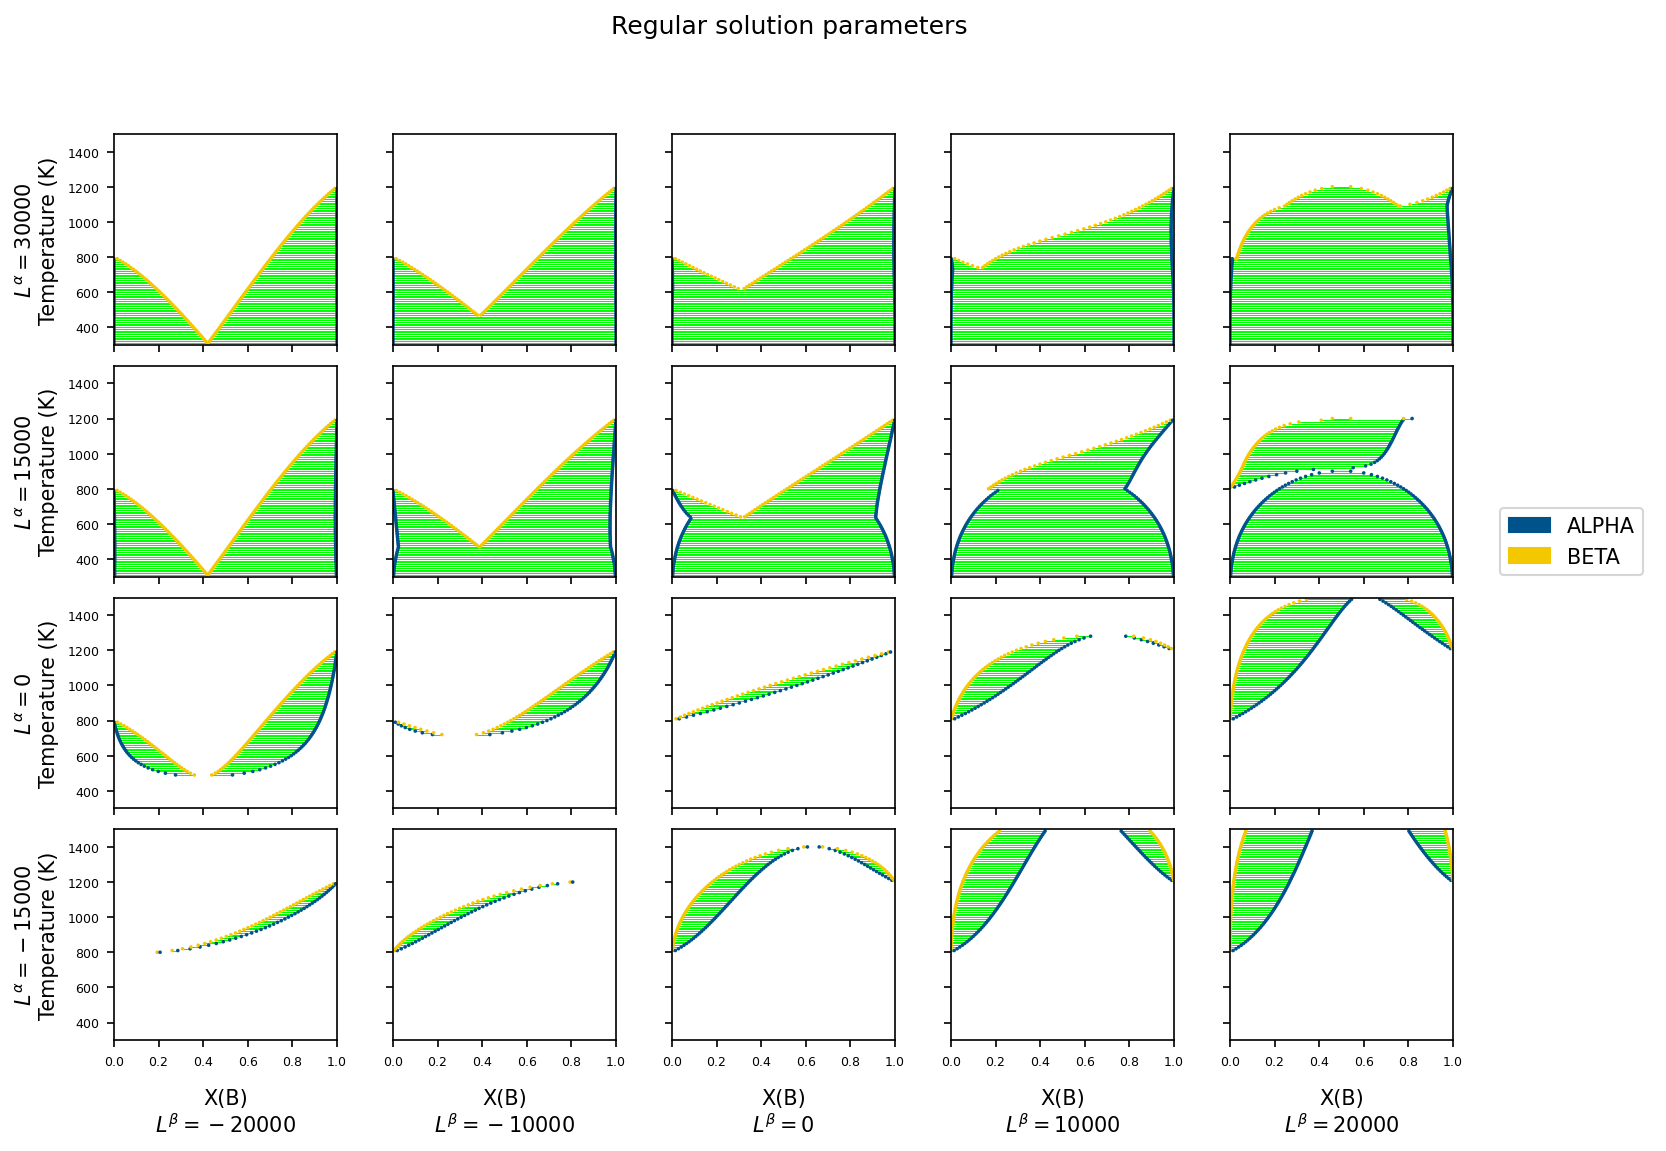

In [3]:
%%time
CONDITIONS = {v.N: 1, v.P: 101325, v.T: (300, 1500, 10), v.X('B'): (0, 1, 0.002)}
L_ALPHAs = [-15000, 0, 15000, 30000]
L_BETAs = [-20000, -10000, 0, 10000, 20000]

fig, subplots = plt.subplots(nrows=len(L_ALPHAs), ncols=len(L_BETAs), sharex=True, sharey=True, gridspec_kw={'hspace': 0.1, 'wspace': 0.0}, dpi=150, figsize=(12, 8))
for idx_A in range(len(L_ALPHAs)):
    for idx_B in range(len(L_BETAs)):
        ax = subplots[idx_A][idx_B]
        # Create the parameter substitution dictionary
        # We need to reverse the list of ALPHA parameters so the rows go in ascending order
        parameters = {'L_ALPHA': list(reversed(L_ALPHAs))[idx_A], 'L_BETA': L_BETAs[idx_B]}
        binplot(dbf, ['A', 'B'], ['ALPHA', 'BETA'], CONDITIONS, plot_kwargs={'ax': ax}, eq_kwargs={'parameters': parameters})
        ax.set_xlim(0, 1)
        ax.set_ylim(CONDITIONS[v.T][0], CONDITIONS[v.T][1])
        # Binplot generates titles and legends automatically. Remove them here.
        ax.legend([]).remove()
        ax.set_title(None)
        # Set the labels
        ax.tick_params(labelsize=6)
        ax.set_xlabel(f"X(B)\n$L^{{\\beta}}={parameters['L_BETA']}$", fontsize=10, labelpad=10)
        ax.set_ylabel(f"$L^{{\\alpha}}={parameters['L_ALPHA']}$\nTemperature (K)", fontsize=10)

# Hide axis and tick labels for all but the bottom and left edges
for ax in subplots.flat:
    ax.label_outer()

# Add a title and legend to the figure
fig.suptitle('Regular solution parameters')
legend_handles = phase_legend(['ALPHA', 'BETA'])[0]
fig.legend(handles=legend_handles, loc=(0.9, 0.5))